# This is week4 activities.
---
## Goal
In this in-class quiz, you will learn:

* Classification -- Try to use Linear Discriminant Analysis (LDA) for binary classification.

We will take a W jets v.s QCD jets (same as Week 01) to be an example.

Scikit-learn package: LDA will help us classify W jets v.s QCD jets into two class.

Ref. [LDA Algorithm](https://scikit-learn.org/stable/modules/lda_qda.html#dimensionality-reduction-using-linear-discriminant-analysis)

Ref. [LDA function](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis)

Ref. [LDA example](https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py)


* How good the classification is -- receiver operating characteristic curve and area under the curve

Once we use LDA to finish the classification, we will use receiver operating characteristic curve (ROC curve) and area under the curve (AUC) to judge how good the model is.

There are serveral metrices to judge how good the model is.
The ROC curve and AUC are two common metrices.
Ref [ROC and AUC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

We will Scikit-learn package "metric" to calculate AUC and help us make the figure of ROC.

You may notice that "metrics.roc_curve" will give us false positive rate and true positive rate. 

We need to make ROC curve based on these two quantities .

Ref. [metrics.roc_auc_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html?highlight=roc_auc_score#sklearn.metrics.roc_auc_score)


Ref. [metrics.roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html?highlight=roc_curve#sklearn.metrics.roc_curve)

Ref. [false positive rate and true positive rate](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
from sklearn.utils import shuffle

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phys591000-week04/X_Test.csv
/kaggle/input/phys591000-week04/W_vs_QCD.csv
/kaggle/input/phys591000-week04/pseudo_data.csv


# Linear Discriminant Analysis

## Example 1

pseudo_data's column names Index(['label', 'feature_1', 'feature_2'], dtype='object')
There are 1000 data for class 0.
There are 1000 data for class 1.


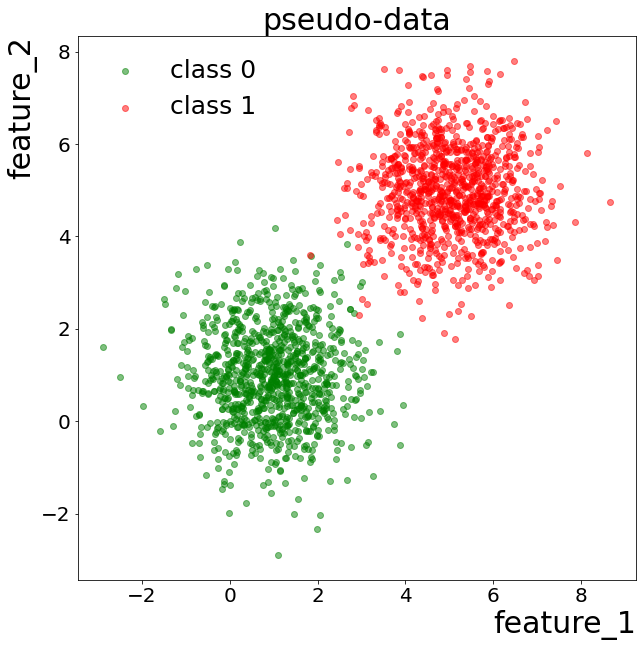

In [2]:
"""
We can use numpy and matplotlib to load and visualize our pseudo-data set.
This cell teach you how to load data and show column name.
"""

"""
load pseudo data
"""

pseudo_data = pd.read_csv("/kaggle/input/phys591000-week04/pseudo_data.csv")

print("pseudo_data's column names",pseudo_data.columns)

one = pseudo_data[pseudo_data["label"] == 0]  # selecte class 0
two = pseudo_data[pseudo_data["label"] == 1]  # selecte class 1

print("There are {} data for class 0.".format(len(one)))
print("There are {} data for class 1.".format(len(two)))

"""
visualize data in "feature_1" and "feature_2" plane
"""

fig, ax = plt.subplots(1,1, figsize=(10,10))

plt.scatter(one["feature_1"],one["feature_2"], c= "green", alpha=0.5, label = "class 0")
plt.scatter(two["feature_1"],two["feature_2"], c= "red", alpha=0.5, label = "class 1")

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.xlabel("feature_1", fontsize=30,horizontalalignment='right',x=1)
plt.ylabel("feature_2", fontsize=30,horizontalalignment='right',y=1)
plt.title("pseudo-data", fontsize=30)

plt.legend(loc="best",ncol=1,fontsize=25, edgecolor = "w",fancybox=False, framealpha=0) 
plt.show()



## Exercise 1

Data's column names
Index(['Unnamed: 0', 'GEN', 'SHO', 'PRO', 'MJ_0', 'PTJ_0', 't21_0', 'D21_0',
       'D22_0', 'C21_0', 'C22_0', 'MJ', 'PTJ', 't21', 'D21', 'D22', 'C21',
       'C22', 'eventindex', 'label'],
      dtype='object')
There are 19900 data for W jets
There are 19900 data for QCD jets


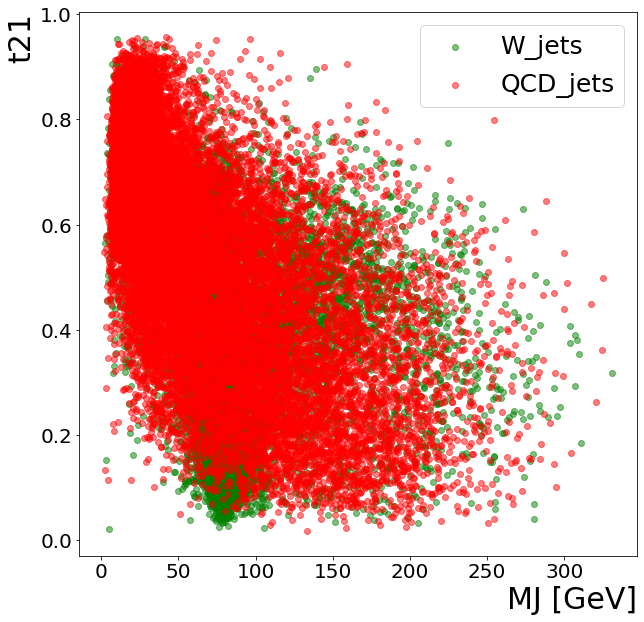

Quiz 01 is passed!


In [3]:
"""
Please load "/kaggle/input/phys591000-week04/W_vs_QCD.csv".
Print the column names for this data set.
Select W jets and QCD jets which are labeled to 0 and 1, respectively.
Then conut how many W jets/CD jets in this file.
Make a figure into "MJ" and "t21" plane with color green for W jets and red for QCD jets.
"""
################################################################################################################
#Your code in this section
import seaborn as sns
Data = pd.read_csv("/kaggle/input/phys591000-week04/W_vs_QCD.csv")

print("Data's column names")

column_names = Data.columns
print(column_names)

W_jets = Data[Data["label"]==0]
QCD_jets = Data[Data["label"]==1]

print("There are {} data for W jets".format(len(W_jets)))
print("There are {} data for QCD jets".format(len(QCD_jets)))


fig, ax = plt.subplots(1,1, figsize=(10,10))

plt.scatter(W_jets["MJ"],W_jets["t21"], c= "green", alpha=0.5, label = "W_jets")
plt.scatter(QCD_jets["MJ"],QCD_jets["t21"], c= "red", alpha=0.5, label = "QCD_jets")

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

plt.xlabel("MJ [GeV]", fontsize=30,horizontalalignment='right',x=1)
plt.ylabel("t21", fontsize=30,horizontalalignment='right',y=1)

plt.legend(loc="best",ncol=1,fontsize=25) 
plt.show()

################################################################################################################
# Check your result is correct or not.
assert len(column_names) == 20, print(f"Your array is not match the request.")
assert column_names[11] == "MJ", print(f"Your 11th array element is not match the request.")
assert len(W_jets)-len(QCD_jets) == 0, print(f"Check the selection rule.")
print("Quiz 01 is passed!")


# Example 2

In [4]:
"""
Scikit-learn package "train_test_split" is a useful tool for spliting data into training and test dataset.
The input for "train_test_split" are training features and tragets.
People often let # of training : # of test = 9 : 1, which means (# of test)/(# of total data) = 0.1.

Once we have training and test dataset, then we can use Scikit-Learn package "LinearDiscriminantAnalysis" to fit data.
"""

"""
Select training features and define data with these features to be "X_pseudo", and the labels to be "target_pseudo"
"""
from sklearn.model_selection import train_test_split

features = ["feature_1","feature_2"]

X_pseudo = pseudo_data[features]
target_pseudo = pseudo_data["label"]

X_pseudo_train, X_pseudo_test, Target_pseudo_train, Target_pseudo_test = train_test_split(X_pseudo, target_pseudo, test_size=0.10, random_state=42)


"""
Check compition of X_train and X_test
"""

print("There are {} Training data are in class 0".format(len(Target_pseudo_train[Target_pseudo_train == 0])))
print("There are {} Training data are in class 1".format(len(Target_pseudo_train[Target_pseudo_train == 1])))

There are 901 Training data are in class 0
There are 899 Training data are in class 1


# Excerise 2

In [5]:
"""
Please split "/kaggle/input/phys591000-week04/W_vs_QCD.csv" into training and test dataset.
The interesting features are "MJ","t21".
Please let # of training : # of test = 9 : 1, which means (# of test)/(# of total data) = 0.1.
Please show how many data belong to W jets/QCD jets in Training data/Test data.
"""
################################################################################################################
#Your code in this section
"""
Select training features and define data with these features to be "X", and labels to be "target"
features : "MJ","t21"
Split X and target into X_train, X_test, Target_train and Target_test.
"""
from sklearn.model_selection import train_test_split

features = ["MJ","t21"]

X = Data[features]
target = Data["label"]
X_train, X_test, Target_train, Target_test = train_test_split(X, target, test_size=0.10, random_state=42)


"""
Check composition of W jets and QCD jets in X_train and X_test
"""
#print(Target_train)

N_W_in_training = len(Target_train[Target_train==0])
                     
N_QCD_in_training =  len(Target_train[Target_train==1])

N_W_in_test = len(Target_test[Target_test==0])

N_QCD_in_test = len(Target_test[Target_test==1])



################################################################################################################

# Check your result is correct or not.
assert  N_W_in_training >= 19900*0.89 , print(f"Please make sure every step is correct!!!")
assert  N_W_in_training <= 19900*0.91 , print(f"Please make sure every step is correct!!!")
assert  N_QCD_in_training >= 19900*0.89 , print(f"Please make sure every step is correct!!!")
assert  N_QCD_in_training <= 19900*0.91 , print(f"Please make sure every step is correct!!!")
assert  N_W_in_test >= 19900*0.09 , print(f"Please make sure every step is correct!!!")
assert  N_W_in_test <= 19900*0.11 , print(f"Please make sure every step is correct!!!")
assert  N_QCD_in_test >= 19900*0.09 , print(f"Please make sure every step is correct!!!")
assert  N_QCD_in_test <= 19900*0.11 , print(f"Please make sure every step is correct!!!")
print("Quiz 02 is passed!")


Quiz 02 is passed!


# Example 3

In [6]:
"""
Once we have training and test dataset, then we can use Scikit-Learn package "LinearDiscriminantAnalysis" to fit data.

Then we can use ".score(X_test, Targer_test)" to get the mean accuracy on the given test data and labels.
"""

"""
Use "LinearDiscriminantAnalysis" to do classification.
"""
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf_pseudo = LinearDiscriminantAnalysis()
clf_pseudo.fit(X_pseudo_train,Target_pseudo_train)

"""
Use ".score(X_test, Targer_test)" to get the mean accuracy.
"""
accuracy = clf_pseudo.score(X_pseudo_test,Target_pseudo_test)

print("The accuracy for this model is {:.2f}.".format(accuracy))



The accuracy for this model is 0.99.


### Here, accuracy means how many predicted classes equal to truth classes divided total number

$$ \texttt{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i) $$

# Excerise 3

In [7]:
"""
Please use "LinearDiscriminantAnalysis" to fit data from Excerise 2.
Then please calculat the accuracy for test data set.
"""
################################################################################################################
#Your code in this section

"""
Use "LinearDiscriminantAnalysis" to do classification.
"""

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train,Target_train)


"""
Use ".score(X_test, Targer_test)" to get the mean accuracy.
"""
accuracy = clf.score(X_test,Target_test)
print("The accuracy for this model is {:.2f}.".format(accuracy))
################################################################################################################

# Check your result is correct or not.
assert  accuracy >= 0.69 , print(f"Please make sure every step is correct!!!")
assert  accuracy <= 0.72 , print(f"Please make sure every step is correct!!!")
print("Quiz 03 is passed!")

The accuracy for this model is 0.71.
Quiz 03 is passed!


# Example 4

The structure of prediction:
[[2.78583601e-09 9.99999997e-01]
 [1.00000000e+00 4.08315646e-11]
 [9.99999876e-01 1.24413849e-07]
 [1.00000000e+00 1.75413849e-10]
 [9.99997240e-01 2.76027968e-06]]


To figure out what 'to_categorical()' is 
Original label:  [0, 0, 0, 0, 1, 1, 1, 1]
After 'to_categorical': 
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]




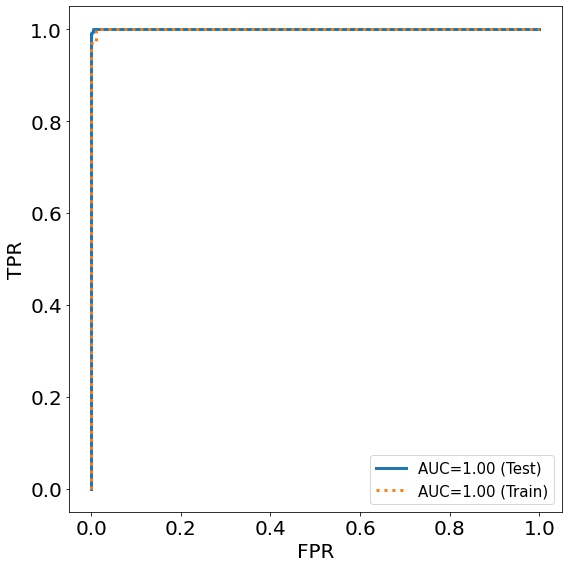

In [8]:
"""
Once we have training and test dataset, then we can use Scikit-Learn package "LinearDiscriminantAnalysis" to fit data.
Then we can use ".predict_proba(X)" to make prediction in probability for the test dataset.
".predict_proba(X)" will return serval vectors, said [[0.4,0.6],[0.2,0.8],[0.12,0.88],[0.87,0.13],......]
The first element of each vector means the probability which X_i belongs to first class.
The second element of each vector means the probability which X_i belongs to second class.

Now, we can let scikit-learn package "metrics.roc_auc_score" to get the AUC and "metrics.roc_curve" to get ROC curve.
Before we implement these two function, we need to let our lebel to be a vetctor, just like outputs of ".predict_proba(X)".
This procedure is one-hot-code transformation.
e.g. 0 -> [1. 0.], 1 ->[0. 1.] in 2-class case.
"to_categorical" in tensorflow.keras.utils is a friendly function for one-hot-code transformation.

It's time to hands-on example for prediction, ROC and AUC calculation.
"""


"""
Use ".predict_proba(X)" to make prediction in probability.
"""
Prediction_X_pseudo_train = clf_pseudo.predict_proba(X_pseudo_train)
Prediction_X_pseudo_test = clf_pseudo.predict_proba(X_pseudo_test)


print("The structure of prediction:")
print(Prediction_X_pseudo_train[:5])

"""
Use "to_categorical" for one-hot-code transformation.
"""
from tensorflow.keras.utils import to_categorical

print("\n")
test_label = [0,0,0,0,1,1,1,1]
print("To figure out what 'to_categorical()' is ")
print("Original label: ", test_label)
print("After 'to_categorical': ")
print(to_categorical(test_label))


Target_pseudo_train_ = to_categorical(Target_pseudo_train)
Target_pseudo_test_ = to_categorical(Target_pseudo_test)
   
    
"""
Use "metrics.roc_auc_score" to get AUC for i-th axis (i-th class).
And "metrics.roc_curve" will return false positive rate and true positive rate. 
We need use these two quantities to make our ROC curve.
"""
from sklearn import metrics

axis = 0
if axis == 0:
    Class = "class 0"
    other = "class 1"
elif axis == 1:
    Class = "class 1"
    other = "class 0"
    

# Get AUC value
train_auc_train = metrics.roc_auc_score(Target_pseudo_train_[:,axis],Prediction_X_pseudo_train[:,axis])
test_auc_test = metrics.roc_auc_score(Target_pseudo_test_[:,axis],Prediction_X_pseudo_test[:,axis])

# Get fpr and tpr
FalsePositive_train, TruePositive_train, _ = metrics.roc_curve(Target_pseudo_train_[:,axis],Prediction_X_pseudo_train[:,axis])
FalsePositive_test, TruePositive_test, _ = metrics.roc_curve(Target_pseudo_test_[:,axis],Prediction_X_pseudo_test[:,axis])

print("\n")
fig, ax = plt.subplots(1,1, figsize=(8,8))


plt.plot(FalsePositive_train, TruePositive_train,linewidth = 3, linestyle="-", label='AUC={0:.2f} (Test)'.format(test_auc_test))
plt.plot(FalsePositive_test, TruePositive_test,linewidth = 3, linestyle=":", label='AUC={0:.2f} (Train)'.format(train_auc_train))

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylabel("TPR",fontsize=20)
plt.xlabel("FPR",fontsize=20)
plt.legend(ncol=1,fontsize=15) #bbox_to_anchor=(0.7, 0.1),
plt.tight_layout()

plt.show()

# Excerise 4

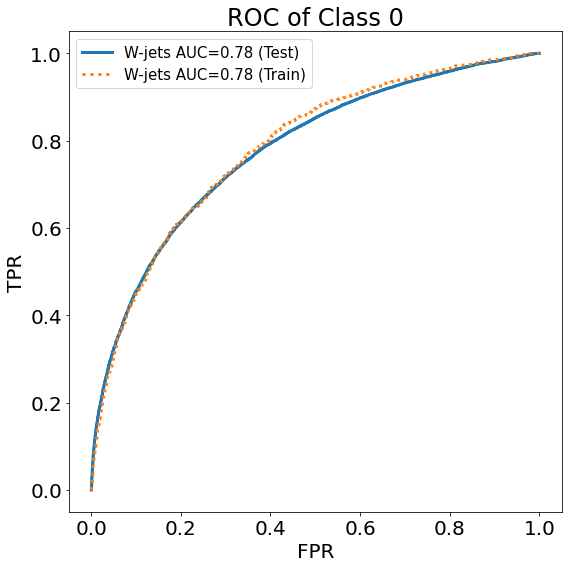

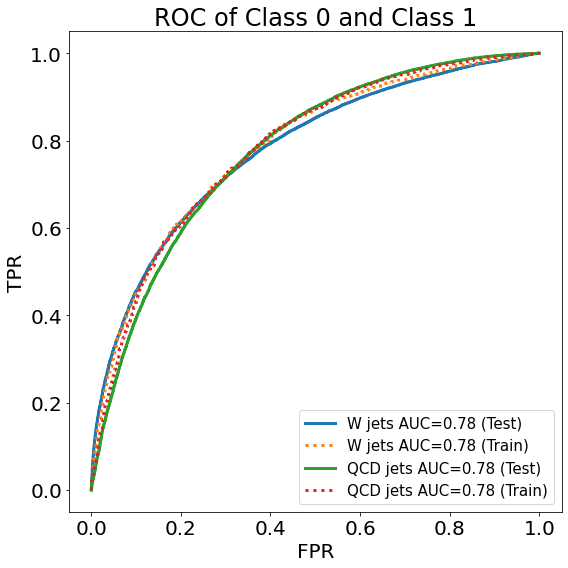

Quiz 04 is passed!


In [9]:
"""
Please use the model which you trained in the Excerise 3 to make prediction 
for the training and test dataset prepared in Excerise 2.

Then, please transfrom the training label and test label to be one-hot code format.

Next, please use "metrics.roc_auc_score" to get AUC values for training and test dataset.

At last, please generate ROC cursves for training and test dataset.
"""
################################################################################################################
#Your code in this section


"""
Use ".predict_proba(X)" to make prediction in probability for training and test dataset prepared in Excerise 2.
"""
Prediction_X_train = clf.predict_proba(X_train)
Prediction_X_test = clf.predict_proba(X_test)


"""
Use "to_categorical" for one-hot-code transformation.
"""
from tensorflow.keras.utils import to_categorical
Target_train_ = to_categorical(Target_train)
Target_test_ = to_categorical(Target_test)
    

"""
Use "metrics.roc_auc_score" to get AUC for frist axis (class 0, W jets).
And "metrics.roc_curve" will return false positive rate and true positive rate. 
You will use these two quantities to make our ROC curve.
"""

from sklearn import metrics

axis = 0

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set_title("ROC of Class 0", fontsize=24)
auc_train = metrics.roc_auc_score(Target_train_[:,axis],Prediction_X_train[:,axis])
auc_test = metrics.roc_auc_score(Target_test_[:,axis],Prediction_X_test[:,axis])

FalsePositive_train, TruePositive_train, _ = metrics.roc_curve(Target_train_[:,axis],Prediction_X_train[:,axis])
FalsePositive_test, TruePositive_test, _ = metrics.roc_curve(Target_test_[:,axis],Prediction_X_test[:,axis])

plt.plot(FalsePositive_train, TruePositive_train,linewidth = 3, linestyle="-", label='W-jets AUC={0:.2f} (Test)'.format(auc_test))
plt.plot(FalsePositive_test, TruePositive_test,linewidth = 3, linestyle=":", label='W-jets AUC={0:.2f} (Train)'.format(auc_train))


ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylabel("TPR",fontsize=20)
plt.xlabel("FPR",fontsize=20)

plt.legend(ncol=1,fontsize=15) #bbox_to_anchor=(0.7, 0.1),
plt.tight_layout()

plt.show()


fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_title("ROC of Class 0 and Class 1", fontsize=24)
for i in range(2):
    axis = i
    if axis == 0:
        Class = "W jets"
        other = "QCD jets"
    elif axis == 1:
        Class = "QCD jets"
        other = "W jets"
        
    auc_train = metrics.roc_auc_score(Target_train_[:,axis],Prediction_X_train[:,axis])
    auc_test = metrics.roc_auc_score(Target_test_[:,axis],Prediction_X_test[:,axis])

    FalsePositive_train, TruePositive_train, _ = metrics.roc_curve(Target_train_[:,axis],Prediction_X_train[:,axis])
    FalsePositive_test, TruePositive_test, _ = metrics.roc_curve(Target_test_[:,axis],Prediction_X_test[:,axis])


    plt.plot(FalsePositive_train, TruePositive_train,linewidth = 3, linestyle="-", label=Class+' AUC={0:.2f} (Test)'.format(auc_test))
    plt.plot(FalsePositive_test, TruePositive_test,linewidth = 3, linestyle=":", label=Class+' AUC={0:.2f} (Train)'.format(auc_train))

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.ylabel("TPR",fontsize=20)
plt.xlabel("FPR",fontsize=20)

plt.legend(ncol=1,fontsize=15) #bbox_to_anchor=(0.7, 0.1),
plt.tight_layout()

plt.show()


################################################################################################################

# Check your result is correct or not.
# Once you make ROC curves, please rise your hand and let TA check your result.

# Check your result is correct or not.

assert  auc_train >= 0.75 , print(f"Please make sure every step is correct!!!")
assert  auc_train <= 0.80 , print(f"Please make sure every step is correct!!!")
assert  auc_test >= 0.75 , print(f"Please make sure every step is correct!!!")
assert  auc_test <= 0.80 , print(f"Please make sure every step is correct!!!")
print("Quiz 04 is passed!")
